In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from Bio.Seq import Seq

In [2]:
matching = 5
mismatching = -2
gap = -6
arrows = None
_max=-1
max_loc=[]  # pair of the location of the heighest value

In [3]:
def match_chars(A, B):
    if A == B:
        return matching
    else:
        return mismatching

In [14]:

def Smith_Waterman(seq1, seq2):
    global max_loc,_max
    m, n = len(seq2), len(seq1)  # length of two sequences

    dt = np.dtype([('diagonal', np.str, 1),
                   ('up', np.str, 1), ('left', np.str, 1)])

    dir_matrix = np.zeros((m + 1, n + 1), dtype=dt)


    final_matrix = np.zeros((m + 1, n + 1), dtype=int)      # the DP table
    # Calculate DynamicProgramming table
    for i in range(0, m + 1):
        final_matrix[i][0] = 0
        dir_matrix[i][0]['up'] = 'U'
    for j in range(0, n + 1):
        final_matrix[0][j] = 0
        dir_matrix[0][j]['left'] = 'L'
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            diagonal = final_matrix[i - 1][j - 1] + \
                match_chars(seq2[i - 1], seq1[j - 1])
            up = final_matrix[i - 1][j] + gap
            left = final_matrix[i][j - 1] + gap
            max_pointer = max(diagonal, up, left,0)
            final_matrix[i][j] = max_pointer
            if (diagonal == max_pointer):
                dir_matrix[i][j]['diagonal'] = 'D'
            if (up == max_pointer):
                dir_matrix[i][j]['up'] = 'U'
            if (left == max_pointer):
                dir_matrix[i][j]['left'] = 'L'
            if _max <= max_pointer:
            	max_loc=[i,j]
            	_max=max_pointer

    # Traceback and compute the alignment
    align1, align2 = '', ''
    i, j = max_loc[0], max_loc[1]  # start from the heighest value
    a = np.array([[0, 0, 0, 0]])
    score_current = final_matrix[i][j]
    first = True
    global arrows
    while score_current>0:  # 0 reached
        score_current = final_matrix[i][j]
        score_diagonal = final_matrix[i - 1][j - 1]
        score_up = final_matrix[i][j - 1]
        score_left = final_matrix[i - 1][j]
        #print("current ",i,j,end='')
        a[:, :2] = j, i
        if score_current == score_diagonal + match_chars(seq2[i - 1], seq1[j - 1]):
            align1 += seq2[i - 1]
            align2 += seq1[j - 1]
            i -= 1
            j -= 1
        elif score_current == score_left + gap:
            align1 += seq2[i - 1]
            align2 += '-'
            i -= 1
        elif score_current == score_up + gap:
            align1 += '-'
            align2 += seq1[j - 1]
            j -= 1
        a[:, 2:] = j, i
        if first:
            # First loop copy a
            arrows = np.copy(a)
            first = False
        else:
            # Concatenate origin-target
            arrows = np.concatenate((arrows, a), axis=0)
    a[:, :2] = a[:, 2:]

    return final_matrix, dir_matrix,align2,align1


In [5]:

def plot(seq1,seq2,final_matrix,dir_matrix):

	# input Data
	headh = seq1
	headv = seq2
	
	# ---------------Plot-------------------------
	plt.rcParams["figure.figsize"] = 4, 5
	param = {"grid.linewidth": 1.6,
	         "grid.color": "lightgray",
	         "axes.linewidth": 1.6,
	         "axes.edgecolor": "lightgray"}
	plt.rcParams.update(param)
	
	
	fig, ax = plt.subplots()
	ax.set_xlim(-1.5, final_matrix.shape[1] - .5)
	ax.set_ylim(-1.5, final_matrix.shape[0] - .5)
	ax.invert_yaxis()
	for i in range(final_matrix.shape[0]):
	    for j in range(final_matrix.shape[1]):
	        ax.text(j, i, final_matrix[i, j], ha="center", va="center")
	for i, l in enumerate(headh):
	    ax.text(i + 1, -1, l, ha="center", va="center", fontweight="semibold")
	for i, l in enumerate(headv):
	    ax.text(-1, i + 1, l, ha="center", va="center", fontweight="semibold")
	
	ax.xaxis.set_minor_locator(ticker.FixedLocator(
	    np.arange(-1.5, final_matrix.shape[1] - .5, 1)))
	ax.yaxis.set_minor_locator(ticker.FixedLocator(
	    np.arange(-1.5, final_matrix.shape[1] - .5, 1)))
	plt.tick_params(axis='both', which='both', bottom='off', top='off',
	                left="off", right="off", labelbottom='off', labelleft='off')
	ax.grid(True, which='minor')
	
	
	arrowprops = dict(facecolor='blue', alpha=0.5, lw=0,
	                  shrink=0.2, width=2, headwidth=7, headlength=7)
	
	# all paths
	for i in range(1, dir_matrix.shape[0]):
	    for j in range(1, dir_matrix.shape[1]):
	        if(dir_matrix[i][j]['left'] != ''):
	            ax.annotate("", xy=(j - 1, i),
	                        xytext=(j, i), arrowprops=arrowprops)
	        if(dir_matrix[i][j]['diagonal'] != ''):
	            ax.annotate("", xy=(j - 1, i - 1),
	                        xytext=(j, i), arrowprops=arrowprops)
	        if(dir_matrix[i][j]['up'] != ''):
	            ax.annotate("", xy=(j, i - 1),
	                        xytext=(j, i), arrowprops=arrowprops)
	
	# optimal path
	arrowprops.update(facecolor='red')
	for i in range(arrows.shape[0]):
	    ax.annotate("", xy=arrows[i, 2:],
	                xytext=arrows[i, :2], arrowprops=arrowprops)
	plt.show()

In [20]:
#-----------------------Example 1--------------------------------
seq1 = Seq("TGCTCGTA")
seq2 = Seq("TTCATA")
final_matrix, dir_matrix,aligned2,aligned1 = Smith_Waterman(seq1, seq2)

In [8]:
print("Local Alignment:")
print("\t"*4,aligned2[::-1])
print("\t"*4,aligned1[::-1])

Local Alignment:
				 TCGTA
				 TCATA


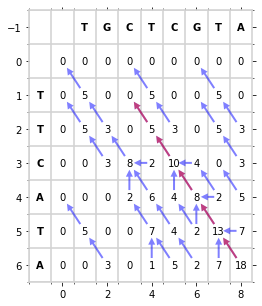

In [9]:
plot(seq1,seq2,final_matrix,dir_matrix)

In [19]:
#-----------------------Example 1--------------------------------
matching = 1
mismatching = -1
gap = -2
arrows = None
_max=-1
max_loc=[]  # pair of the location of the heighest value

In [16]:
seq1 = Seq("GGTTGACTA")
seq2 = Seq("TGTTACGG")
final_matrix, dir_matrix,aligned2,aligned1 = Smith_Waterman(seq1, seq2)

In [17]:
print("Local Alignment:")
print("\t"*4,aligned2[::-1])
print("\t"*4,aligned1[::-1])

Local Alignment:
				 GTTGAC
				 GTT-AC


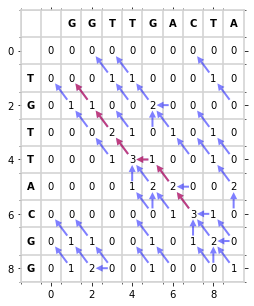

In [18]:
plot(seq1,seq2,final_matrix,dir_matrix)